In [2]:
import pandas as pd
import numpy as np

In [92]:
etsy = pd.read_csv("data/EtsySoldOrderItems2022.csv")
etsy_2021 = pd.read_csv("data/EtsySoldOrderItems2021.csv")

etsy = pd.concat([etsy, etsy_2021])

# extract username from Buyer column
etsy['Buyer'] = etsy['Buyer'].str.extract(r'(\(.*?\))')
etsy['Buyer'] = etsy['Buyer'].str.replace(r'(\(|\))', '', regex=True)

# remove paper size from SKUs
etsy['SKU'] = etsy['SKU'].str.replace(r'(A4|A3|A5)', '', regex=True)

etsy.head(10)

,Sale Date,Item Name,Buyer,Quantity,Price,Coupon Code,Coupon Details,Discount Amount,Delivery Discount,Order Delivery,...,Delivery Country,Order ID,Variations,Order Type,Listings Type,Payment Type,InPerson Discount,InPerson Location,VAT Paid by Buyer,SKU
0,12/30/22,Tea Witch & Queer Magic - Teapot and Teacup Ar...,istolesherlocksskull,2,8.0,JANUARY2023,JANUARY2023 - % off,1.6,0.00,0.0,...,United Kingdom,2743436609,"Size:A5 - 21 x 15 cm,Design:Tea Witch",online,listing,online_cc,NaN,NaN,0.0,TPOT
1,12/30/22,The Mushroom Babes Identification Poster - A3 ...,msukm9zk,1,18.0,JANUARY2023,JANUARY2023 - % off,1.8,0.00,0.0,...,United Kingdom,2743165157,"Size:A4 - 21 x 30 cm,Design:Twin Pack",online,listing,online_cc,NaN,NaN,0.0,IDTWIN
2,12/30/22,Breastfeeding Babes A3 Poster Print - Unframed...,georgieferrari2,1,25.0,JANUARY2023,JANUARY2023 - % off,2.5,0.00,0.0,...,United Kingdom,2742992535,Style:Set of both,online,listing,online_cc,NaN,NaN,0.0,BFTWIN
3,12/30/22,Be Gay Do Crime Art Print - A4 / A5 - Pride Co...,9f6od8ikbe3miykh,1,12.0,JANUARY2023,JANUARY2023 - % off,1.2,0.00,0.0,...,United Kingdom,2742939487,Size:A4 - 29.8 x 21 cm,online,listing,online_cc,NaN,NaN,0.0,BGDC
4,12/29/22,The Mushroom Babes Identification Poster - A3 ...,dereksweeney,1,18.0,JANUARY2023,JANUARY2023 - % off,1.8,0.00,0.0,...,United Kingdom,2742283195,"Size:A4 - 21 x 30 cm,Design:Twin Pack",online,listing,online_cc,NaN,NaN,0.0,IDTWIN
5,12/29/22,Be Gay Do Crime Art Print - A4 / A5 - Pride Co...,galenaj,1,8.0,NaN,NaN,0.0,4.42,0.0,...,United States,2742167751,Size:A5 - 21 x 14.9 cm,online,listing,online_cc,NaN,NaN,0.0,BGDC
6,12/29/22,"Artist Conk Mushroom 8"" Square Art Print - Eco...",galenaj,1,14.0,NaN,NaN,0.0,0.00,0.0,...,United States,2742167751,Products:8&quot; Print + Sticker,online,listing,online_cc,NaN,NaN,0.0,SQ21ARTSTK
7,12/29/22,"Soft Artist Conk Mushroom Babe 8"" Square Art P...",galenaj,1,10.0,NaN,NaN,0.0,0.00,0.0,...,United States,2742167751,NaN,online,listing,online_cc,NaN,NaN,0.0,SQ21SFT
8,12/29/22,Weed Babes 8cm Sticker - Eco-Friendly Paper St...,galenaj,1,2.5,NaN,NaN,0.0,0.00,0.0,...,United States,2742167751,Number of stickers:Indi (Indica Babe),online,listing,online_cc,NaN,NaN,0.0,STKWDI
9,12/28/22,The Mushroom Babes Identification Poster - A3 ...,m2j3xltp1tij0y3o,1,20.0,NaN,NaN,0.0,0.00,0.0,...,United States,2741338231,"Size:A4 - 21 x 30 cm,Design:Twin Pack",online,listing,online_cc,NaN,NaN,0.0,IDTWIN


In [93]:
# convert usernames to IDs
etsy["Buyer"], name_index = etsy["Buyer"].factorize()

# Count the occurrences of each value in the 'Buyer' column
counts = etsy["Buyer"].value_counts()

# Filter the DataFrame to include only rows where the value in the 'Buyer' column occurs more than once
etsy_multi = etsy[etsy["Buyer"].isin(counts[counts > 1].index)]

# select required columns & remove duplicates
etsy_df = etsy_multi[['Buyer', 'SKU', 'Quantity']].drop_duplicates()

In [94]:
top_50_items = etsy_df.groupby('SKU').agg(
    orders=('Buyer', 'nunique'),
    quantity=('Quantity', 'sum')
).sort_values(by='orders', ascending=False).head(50)

In [95]:
etsy_df_items = etsy_df[etsy_df["SKU"].isin(top_50_items.index)].pivot_table(index='Buyer', columns=['SKU'], values='Quantity').fillna(0)
etsy_df_items.head(3)

SKU,BDYHR,BFBPAN,BGDC,BOUQ,CATS,CLRBKMINI,CLRBKMINIDIGI,FROG,FTP,FTT,...,STKPRTY,STKSHTN,STKSHTPK,STKSNL2,STKTEA2,TEA2,TPOT,TXEX,WD2,WDI
Buyer,,,,,,,,,,,,,,,,,,,,,
-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
def get_recommendations(df, sku):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        df (dataframe): Pandas dataframe containing matrix of items purchased.
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = df.corrwith(df[sku])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

In [97]:
recommendations = get_recommendations(etsy_df_items, 'BGDC')
recommendations.head()

,SKU,correlation
2,BGDC,1.000000
4,CATS,0.187373
10,GPRTY,0.176196
26,PUMP,0.154913
27,QUEEN,0.154913


In [34]:
# Group the dataframe by 'written_by' and get the size of each group
etsy_items = etsy.groupby('SKU').size()

# Convert the resulting Series to a dataframe with a column named 'count'
etsy_df = etsy_items.to_frame(name='Sales')

# If you want to reset the index so that 'written_by' is a column in the resulting dataframe, you can use the reset_index method
etsy_df = etsy_df.reset_index()

# sort by count value
etsy_df_x = etsy_df.sort_values(by='Sales', ascending=False)

# Determine order and create a categorical type
item_list = etsy['SKU'].value_counts().index.tolist()
item_cat = pd.Categorical(etsy_df_x['SKU'], categories=item_list)

# assign to a new column in the DataFrame
etsy_df = etsy_df_x.assign(item_cat = item_cat)

etsy_df_plot = etsy_df.head(100)

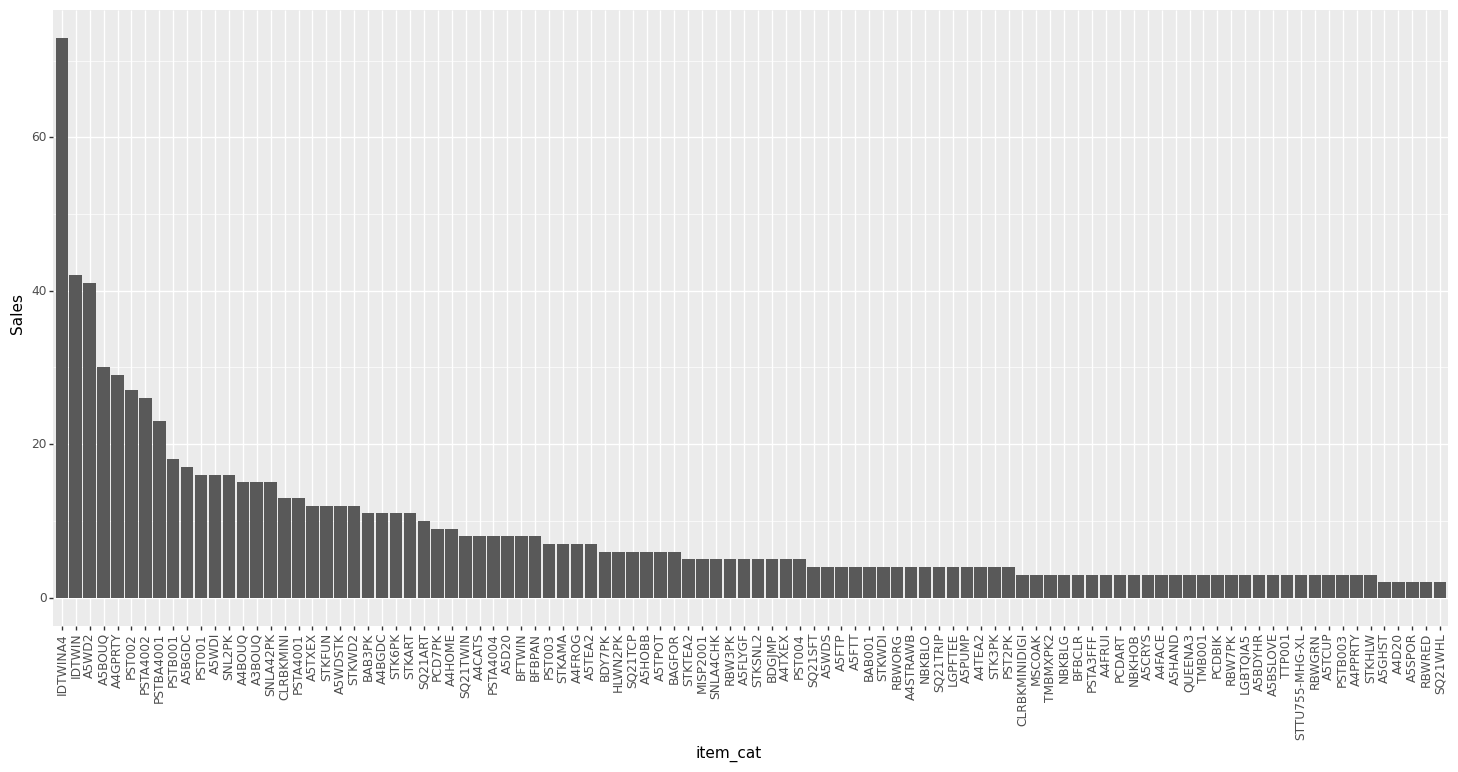

<ggplot: (122969945540)>

In [47]:
from plotnine import *

(ggplot(etsy_df_plot, aes('item_cat', 'Sales'))
 + geom_col()
 + theme(axis_text_x = element_text(angle=90), 
         figure_size = (18,8)))